In [1]:
import os
import pandas as pd
import matplotlib.pylab as plt
from aup.ET.Connector.SQLiteConnector import SQLiteConnector
import json
%matplotlib inline

In [2]:
# connect to the result (The database is copied from ~/.aup/sqlite3.db)
sql = SQLiteConnector("./sqlite3.db")

In [3]:
# Get all experiments (this run is for iris using hyperopt, sequence, spearmint, random)
eids = sql.get_all_experiment()
eids

[1, 2, 3, 4]

In [4]:
# Show details in one experiment
sql.cursor.execute("SELECT * FROM experiment where eid = ?", (eids[1],))
sql.cursor.fetchone()

(2,
 1,
 1534397382,
 1534397474,
 '{"script": "premade_estimator_hpo.py", "n_parallel": 2, "parameter_config": [{"type": "int", "name": "layer1", "range": [2, 6]}, {"type": "int", "name": "layer2", "range": [2, 6]}], "resource": "gpu", "proposer": "sequence", "target": "max", "workingdir": "Examples/tf_iris_diff_opt"}')

In [5]:
# show details in job history for one experiment
history = sql.get_all_history(1)
history = pd.DataFrame(history)
history.columns = ['jid', 'score','eid','rid','start_time','end_time','job_config']
history

,jid,score,eid,rid,start_time,end_time,job_config
0,1,0.966667,1,1,1534397309,1534397318,"{'layer2': 2, 'tid': 0, 'layer1': 2}"
1,2,0.933333,1,2,1534397309,1534397318,"{'layer2': 5, 'tid': 1, 'layer1': 2}"
2,3,0.966667,1,1,1534397318,1534397325,"{'layer2': 4, 'tid': 2, 'layer1': 3}"
3,4,0.966667,1,2,1534397318,1534397325,"{'layer2': 4, 'tid': 3, 'layer1': 3}"
4,5,0.966667,1,1,1534397325,1534397332,"{'layer2': 4, 'tid': 4, 'layer1': 4}"
5,6,0.966667,1,2,1534397325,1534397332,"{'layer2': 3, 'tid': 5, 'layer1': 5}"
6,7,1.000000,1,1,1534397332,1534397339,"{'layer2': 3, 'tid': 6, 'layer1': 5}"
7,8,0.266667,1,2,1534397332,1534397340,"{'layer2': 2, 'tid': 7, 'layer1': 2}"
8,9,0.966667,1,1,1534397339,1534397346,"{'layer2': 5, 'tid': 8, 'layer1': 5}"
9,10,0.966667,1,2,1534397340,1534397347,"{'layer2': 3, 'tid': 9, 'layer1': 2}"


Text(0,0.5,'Best Accuracy so far')

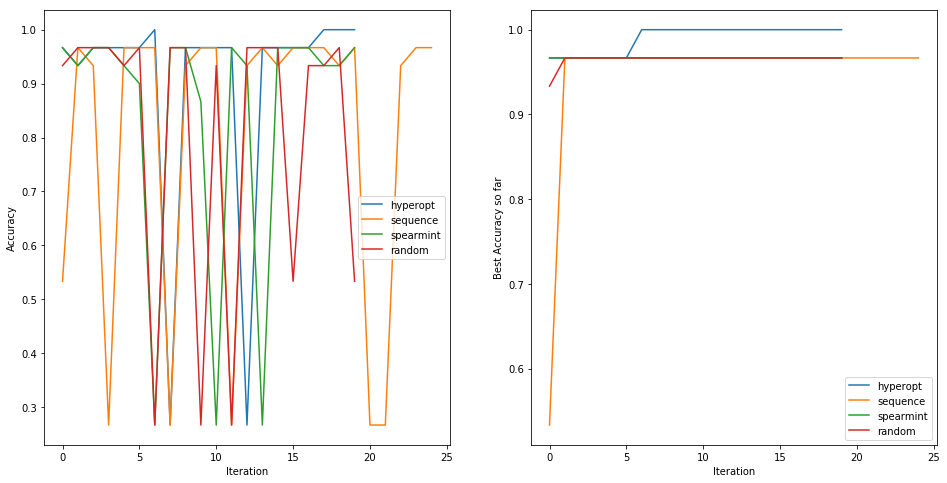

In [6]:
plt.figure(figsize=(16,8))
plt.subplot(121)
for i in eids:
    history = sql.get_all_history(i)
    history = pd.DataFrame(history)
    history.columns = ['jid', 'score','eid','rid','start_time','end_time','job_config']
    sql.cursor.execute("SELECT * FROM experiment where eid = ?", (i,))
    label = json.loads(sql.cursor.fetchone()[4])['proposer']
    plt.plot(history.score, label=label)
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("Accuracy")

plt.subplot(122)
for i in eids:
    history = sql.get_all_history(i)
    history = pd.DataFrame(history)
    history.columns = ['jid', 'score','eid','rid','start_time','end_time','job_config']
    sql.cursor.execute("SELECT * FROM experiment where eid = ?", (i,))
    label = json.loads(sql.cursor.fetchone()[4])['proposer']
    plt.plot(history.score.cummax(), label=label)
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("Best Accuracy so far")

In [7]:
sql.close()